# Small World Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import random

from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

In [2]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

**Exercise 3.6** Dijkstra’s algorithm solves the “single source shortest path” problem, but to compute the characteristic path length of a graph, we actually want to solve the “all pairs shortest path” problem.
Of course, one option is to run Dijkstra’s algorithm n times, once for each starting node. And for some applications, that’s probably good enough. But there are are more efficient alternatives.
Find an algorithm for the all-pairs shortest path problem and implement it. See http://thinkcomplex.com/short.
Compare the run time of your implementation with running Dijkstra’s algorithm n times. Which algorithm is better in theory? Which is better in practice? Which one does NetworkX use?


For this part, we try to implement Floyd-Warshall algorithm. This is the pseudocode:
```
let dist be a |V| × |V| array of minimum distances initialized to ∞ (infinity)
for each edge (u, v) do  
    dist[u][v] ← w(u, v)  // The weight of the edge (u, v)
for each vertex v do
    dist[v][v] ← 0
for k from 1 to |V|
    for i from 1 to |V|
        for j from 1 to |V|
            if dist[i][j] > dist[i][k] + dist[k][j] 
                dist[i][j] ← dist[i][k] + dist[k][j]
            end if
```

Let's consider the following graph with weights:

{(0, 3): 5,
 (0, 1): 3,
 (1, 3): 4,
 (1, 0): 2,
 (2, 1): 1,
 (3, 2): 2,
 (3, 4): 1,
 (4, 0): 4,
 (4, 2): 1}

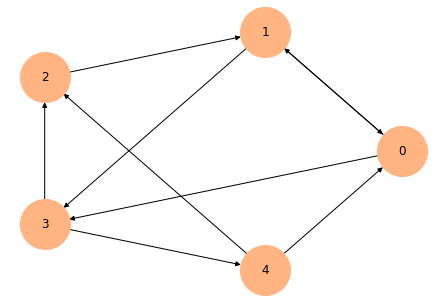

In [3]:
nodes = range(5)
edges = {(0,1,3),
         (1,0,2),
        (0, 3,5),
        (2, 1,1),
        (3, 2,2),
        (1,3,4),
        (4,0,4),
        (4,2,1),
        (3,4,1)}

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

nx.draw_circular(G, 
        node_color='C1', 
        node_size=2500, 
        with_labels=True)

labels = nx.get_edge_attributes(G,'weight')
labels

In [4]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Following the pseudocode, we come up with 2 functions. The only difference is how the original array is initialized. We will compare how this runs with other functions in networkx.

In [5]:
def floyd_warshall(G):
    size = len(G)
    high = np.inf
    #Initialize Array 1
    
    dist_array = np.zeros((size,size))
    
    #This for loop initializes the dist array
    for u in range(size):
        for v in range(size):
            try:
                dist = G.get_edge_data(u,v)['weight']
            except:
                dist = high
            
            dist_array[u,v] = dist
        dist_array[u,u] = 0
    
    
    #k is the node that we are starting from 
    for k in range(size):
        for i in range(size):
            for j in range (size):
                 dist_array[i][j] = min(dist_array[i][j], dist_array[i][k] + dist_array[k][j])
    
    return dist_array


In [6]:
def floyd_warshall_ver2(G):
    size = len(G)
    high = np.inf
    #Initialize Array 1

    dist_array = np.ones((size,size))*high

    #This for loop initializes the weights in the array
    for u,v in G.edges():
        dist_array[u,v] = G.get_edge_data(u,v)['weight']

    #Set diagonal to 0
    for u in range(size):
        dist_array[u,u] = 0

        
    #k is the node that we are starting from 
    for k in range(size):
        for i in range(size):
            for j in range (size):
                 dist_array[i][j] = min(dist_array[i][j], dist_array[i][k] + dist_array[k][j])
    
    return dist_array



In [7]:
%timeit floyd_warshall(G)

279 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit floyd_warshall_ver2(G)

267 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit list(nx.all_pairs_dijkstra_path_length(G))

52.1 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%timeit [nx.single_source_dijkstra_path_length(G,i) for i in G.nodes()]

51.9 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
floyd_warshall(G)

array([[0., 3., 7., 5., 6.],
       [2., 0., 6., 4., 5.],
       [3., 1., 0., 5., 6.],
       [5., 3., 2., 0., 1.],
       [4., 2., 1., 6., 0.]])

In [12]:
floyd_warshall_ver2(G)

array([[0., 3., 7., 5., 6.],
       [2., 0., 6., 4., 5.],
       [3., 1., 0., 5., 6.],
       [5., 3., 2., 0., 1.],
       [4., 2., 1., 6., 0.]])

In [13]:
list(nx.all_pairs_dijkstra_path_length(G))

[(0, {0: 0, 1: 3, 3: 5, 4: 6, 2: 7}),
 (1, {1: 0, 0: 2, 3: 4, 4: 5, 2: 6}),
 (2, {2: 0, 1: 1, 0: 3, 3: 5, 4: 6}),
 (3, {3: 0, 4: 1, 2: 2, 1: 3, 0: 5}),
 (4, {4: 0, 2: 1, 1: 2, 0: 4, 3: 6})]

In [14]:
[nx.single_source_dijkstra_path_length(G,i) for i in G.nodes()]

[{0: 0, 1: 3, 3: 5, 4: 6, 2: 7},
 {1: 0, 0: 2, 3: 4, 4: 5, 2: 6},
 {2: 0, 1: 1, 0: 3, 3: 5, 4: 6},
 {3: 0, 4: 1, 2: 2, 1: 3, 0: 5},
 {4: 0, 2: 1, 1: 2, 0: 4, 3: 6}]

All have the same results, but we see that our implementation of Floyd-Warshall (for both cases is slower than running NetworkX's Dijkstra n times and NetworkX's implementation of all pairs dijkstra distance. 

In theory, the order of growth of Floyd-Warshall is $n^3$ (we loop through the nodes three times, it's also nested for loops).

For the implementation, sometimes, version 2 is faster because it has two separate for loops instead of two nested for loops. This implementation only works for weighted networks without negative cycles. In our test network, all the weights are positive.